In [314]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical
from keras import layers

In [315]:
np.random.seed(42)

In [316]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [317]:
X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [318]:
y_train.shape
x_train.shape

(56000, 28, 28)

In [319]:
x_train_reshape = np.zeros((x_train.shape[0], 10))
x_train_reshape.shape

(56000, 10)

In [320]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [321]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [322]:
x_train.shape

(56000, 784)

##Model 1

In [323]:
model1 = MLPClassifier(random_state=1, max_iter=10000)

In [324]:
model1.fit(x_train,y_train)

MLPClassifier(max_iter=10000, random_state=1)

In [325]:
score = cross_val_score(model1, x_train, y_train, cv=5)
score

array([0.97660714, 0.97383929, 0.97616071, 0.97455357, 0.96616071])

In [352]:
score_test = cross_val_score(model1,x_test,y_test, cv=5)

In [355]:
score1_test_avg = score_test.mean()

In [356]:
score_collection_test = []
score_collection_test.append(score1_test_avg)

In [326]:
df = pd.DataFrame(score)
df.rename(columns={0:'model 1'})


,model 1
0,0.976607
1,0.973839
2,0.976161
3,0.974554
4,0.966161


In [327]:
score1 = score.mean()
score_collection = []
score_collection.append(score1)


In [328]:
score_collection

[0.9734642857142857]

## Model 2
https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md



In [329]:
num_features = 784
num_classes = 10

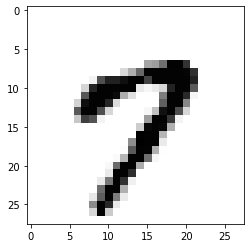

7


In [330]:
observation = 15
plt.imshow(X[observation], cmap='Greys')
plt.show()
print(Y[observation])

In [331]:
x_train.shape

(56000, 784)

In [332]:
# Saving backups for later
Y_train_vals = y_train
Y_test_vals = y_test

In [333]:
# Convert class values to class vectors (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [334]:
df

,0
0,0.976607
1,0.973839
2,0.976161
3,0.974554
4,0.966161


In [ ]:
# Merge inputs and targets
inputs = X
targets = Y
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
score2 = []
score2_test = []

for train, test in kfold.split(x_train, y_train):
  model2 = Sequential()
  model2.add(layers.Dense(400, input_shape=(num_features,)))
  model2.add(layers.Dense(150, activation='relu'))
  model2.add(layers.Dense(50, activation='relu'))
  model2.add(layers.Dense(10, activation="softmax"))
  model2.summary()
  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model2.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
  # Test the model after training
  train_restul = model2.evaluate(x_train, y_train, verbose=0)
  print(f'Train results - Loss: {train_restul[0]} - Accuracy: {train_restul[1]}%')

  # Test the model after training
  test_restul = model2.evaluate(x_test, y_test, verbose=0)
  print(f'Test results - Loss: {test_restul[0]} - Accuracy: {test_restul[1]}%')
  score2.append(train_restul[1])
  score2_test.append(test_restul[1])

In [364]:
score_collection_test.append(sum(score2_test)/len(score2_test))

In [ ]:
score_collection_test

In [336]:
score2

[0.9884464144706726,
 0.9887499809265137,
 0.9873214364051819,
 0.9900714159011841,
 0.9881428480148315]

In [337]:
df['model 2'] = score2
df

,0,model 2
0,0.976607,0.988446
1,0.973839,0.988750
2,0.976161,0.987321
3,0.974554,0.990071
4,0.966161,0.988143


##Model 3

In [ ]:
score3 = []
score3_test = []
for train, test in kfold.split(inputs, targets):
  model3 = Sequential()
  model3.add(layers.Dense(64, input_shape=(num_features,)))
  model3.add(layers.Dense(32, activation='relu'))
  model3.add(layers.Dense(8, activation='relu'))
  model3.add(layers.Dense(10, activation="softmax"))
  model3.summary()
  model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model3.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
  # Test the model after training
  train_restul3 = model3.evaluate(x_train, y_train, verbose=0)
  print(f'Train results - Loss: {train_restul3[0]} - Accuracy: {train_restul3[1]}%')

  # Test the model after training
  test_restul3 = model3.evaluate(x_test, y_test, verbose=0)
  print(f'Test results - Loss: {test_restul3[0]} - Accuracy: {test_restul3[1]}%')
  score3.append(train_restul3[1])
  score3_test.append(test_restul3[1])

In [367]:
df['model 3'] = score3

In [368]:
score_collection_test.append(sum(score3_test)/len(score3_test))

In [341]:
df

,0,model 2,model 3
0,0.976607,0.988446,0.959857
1,0.973839,0.988750,0.962482
2,0.976161,0.987321,0.961232
3,0.974554,0.990071,0.963857
4,0.966161,0.988143,0.957179


##Model 4




In [369]:
score4 = []
score4_test = []

for train, test in kfold.split(inputs, targets):
  model4 = Sequential()
  model4.add(layers.Dense(32, input_shape=(num_features,),activation='relu'))
  model4.add(layers.Dense(16, activation='relu'))
  model4.add(layers.Dense(10, activation="softmax"))
  model4.summary()
  model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model4.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
  # Test the model after training
  train_restul4 = model4.evaluate(x_train, y_train, verbose=0)
  print(f'Train results - Loss: {train_restul4[0]} - Accuracy: {train_restul4[1]}%')

  # Test the model after training
  test_restul4 = model4.evaluate(x_test, y_test, verbose=0)
  print(f'Test results - Loss: {test_restul4[0]} - Accuracy: {test_restul4[1]}%')
  score4.append(train_restul4[1])
  score4_test.append(test_restul4[1])

Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_715 (Dense)           (None, 32)                25120     
                                                                 
 dense_716 (Dense)           (None, 16)                528       
                                                                 
 dense_717 (Dense)           (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
180/180 [==============================] - 2s 7ms/step - loss: 0.8352 - accuracy: 0.7676 - val_loss: 0.3792 - val_accuracy: 0.8950
Epoch 2/10
180/180 [==============================] - 1s 7ms/step - loss: 0.3138 - accuracy: 0.9115 - val_loss: 0.2829 - val_accuracy: 0.9208
Epoch 3/10
180/180 [========

In [370]:
score_collection_test.append(sum(score4_test)/len(score4_test))

In [371]:
df['model 4'] = score4

In [372]:
df

,model 1,model 2,model 3,model 4,model 5,model 6
0,0.976607,0.988446,0.961911,0.966554,0.990125,0.993107
1,0.973839,0.988750,0.961429,0.965268,0.988268,0.989643
2,0.976161,0.987321,0.963571,0.963304,0.987429,0.991982
3,0.974554,0.990071,0.957089,0.962196,0.985179,0.993107
4,0.966161,0.988143,0.963589,0.962321,0.988411,0.994643


##Model 5

In [373]:
score5 = []
score5_test = []
for train, test in kfold.split(inputs, targets):
  model5 = Sequential()
  model5.add(layers.Dense(120, input_shape=(num_features,),activation='relu'))
  model5.add(layers.Dense(64, activation='relu'))
  model5.add(layers.Dense(16, activation='relu'))
  model5.add(layers.Dense(10, activation="softmax"))
  model5.summary()
  model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model5.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
  # Test the model after training
  train_restul5 = model5.evaluate(x_train, y_train, verbose=0)
  print(f'Train results - Loss: {train_restul5[0]} - Accuracy: {train_restul5[1]}%')

  # Test the model after training
  test_restul5 = model5.evaluate(x_test, y_test, verbose=0)
  print(f'Test results - Loss: {test_restul5[0]} - Accuracy: {test_restul5[1]}%')
  score5.append(train_restul5[1]) 
  score5_test.append(test_restul5[1])



Model: "sequential_192"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_730 (Dense)           (None, 120)               94200     
                                                                 
 dense_731 (Dense)           (None, 64)                7744      
                                                                 
 dense_732 (Dense)           (None, 16)                1040      
                                                                 
 dense_733 (Dense)           (None, 10)                170       
                                                                 
Total params: 103,154
Trainable params: 103,154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
180/180 [==============================] - 2s 10ms/step - loss: 0.6596 - accuracy: 0.8009 - val_loss: 0.2546 - val_accuracy: 0.9290
Epoch 2/10
180/180 [===============

In [374]:
df['model 5'] = score5

In [375]:
score_collection_test.append(sum(score5_test)/len(score5_test))

##Model 6

In [ ]:
score6=[]
score6_test = []
for train, test in kfold.split(inputs, targets):
  model6 = Sequential()
  model6.add(layers.Dense(320, input_shape=(num_features,),activation='relu'))
  model6.add(layers.Dense(120, activation='relu'))
  model6.add(layers.Dense(32, activation='relu'))
  model6.add(layers.Dense(10, activation="softmax"))
  model6.summary()
  model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model6.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)
  # Test the model after training
  train_restul6 = model6.evaluate(x_train, y_train, verbose=0)
  print(f'Train results - Loss: {train_restul6[0]} - Accuracy: {train_restul6[1]}%')
  # Test the model after training
  test_restul6 = model6.evaluate(x_test, y_test, verbose=0)
  print(f'Test results - Loss: {test_restul6[0]} - Accuracy: {test_restul6[1]}%')
  score6.append(train_restul6[1])
  score6_test.append(test_restul6[1])



In [377]:
score_collection_test.append(sum(score6_test)/len(score6_test))

In [350]:
df['model 6'] = score6

In [351]:
df = df.rename(columns={0:'model 1'})

In [381]:
score_collection_test

[0.9292142857142857,
 0.9718857169151306,
 0.9511714339256286,
 0.9554142713546753,
 0.9702285885810852,
 0.976371431350708]

In [ ]:
score_collection_backup = score_collection

In [380]:
df

,model 1,model 2,model 3,model 4,model 5,model 6
0,0.976607,0.988446,0.961911,0.966554,0.986286,0.993107
1,0.973839,0.988750,0.961429,0.965268,0.986429,0.989643
2,0.976161,0.987321,0.963571,0.963304,0.983179,0.991982
3,0.974554,0.990071,0.957089,0.962196,0.984571,0.993107
4,0.966161,0.988143,0.963589,0.962321,0.986589,0.994643


In [379]:
df.columns

Index(['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6'], dtype='object')

In [393]:
score_collection_test

[0.9292142857142857,
 0.9718857169151306,
 0.9511714339256286,
 0.9554142713546753,
 0.9702285885810852,
 0.976371431350708]

In [394]:
score_collection_backup

[0.9496964285714287,
 0.9886000037193299,
 0.9600464344024658,
 0.9639464378356933,
 0.9876071333885192,
 0.9898714303970337]

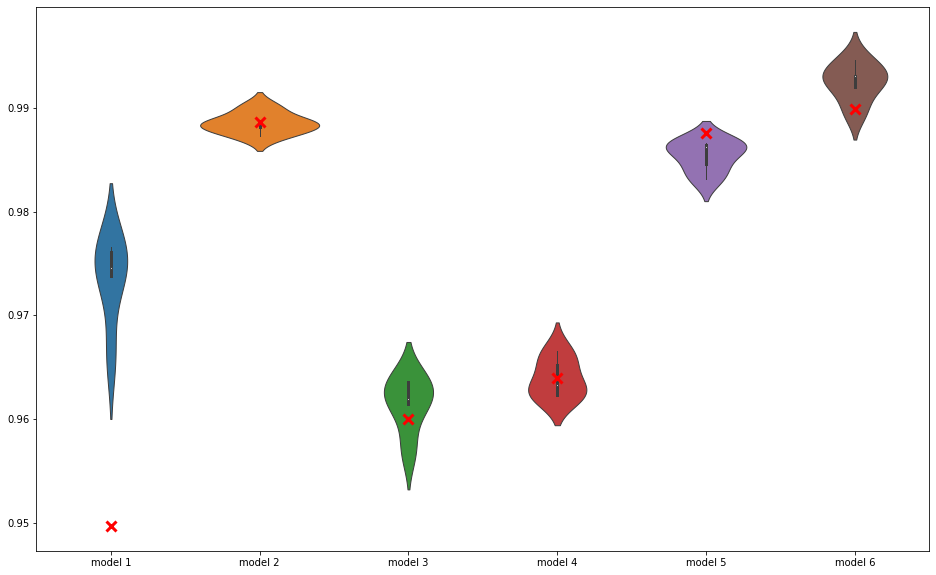

In [398]:
plt.figure(figsize=(16,10))
sns.violinplot(data=df,linewidth = 1)
sns.swarmplot(x=df.columns, y=score_collection_backup, marker='x', size=10, linewidth=3, color="r", alpha=1)

plt.show()